# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [3]:
#read the data

data_path = 'data.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [5]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [6]:
round(df.isnull().sum(axis=0) * 100 / df.shape[0], 2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [7]:
print(df.isnull().sum())

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


In [8]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Wrong Types + separartors need to be changed.          <br>
2- Missing Data.           <br>
3- There should be some outliers. Will be removed by MinMax Transformation         <br>

In [9]:
#make a copy for the original dataset
df_copy = df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

##### solution: change the wrong separators, change the dtypes 


In [10]:
#test 
df_copy['Pop. Density (per sq. mi.)'] = df_copy['Pop. Density (per sq. mi.)'].str.replace(',','.').apply(float)
df_copy['Coastline (coast/area ratio)'] = df_copy['Coastline (coast/area ratio)'].str.replace(',','.').apply(float)
df_copy['Net migration'] = df_copy['Net migration'].str.replace(',','.').apply(float)
df_copy['Infant mortality (per 1000 births)']= df_copy['Infant mortality (per 1000 births)'].str.replace(',','.').apply(float)
df_copy['Literacy (%)'] = df_copy['Literacy (%)'].str.replace(',','.').apply(float)
df_copy['Phones (per 1000)']= df_copy['Phones (per 1000)'].str.replace(',','.').apply(float)
df_copy['Arable (%)'] = df_copy['Arable (%)'].str.replace(',','.').apply(float)
df_copy['Crops (%)'] = df_copy['Crops (%)'].str.replace(',','.').apply(float)
df_copy['Other (%)'] = df_copy['Other (%)'].str.replace(',','.').apply(float)
df_copy['Birthrate'] = df_copy['Birthrate'].str.replace(',','.').apply(float)
df_copy['Deathrate'] = df_copy['Deathrate'].str.replace(',','.').apply(float)
df_copy['Agriculture'] = df_copy['Agriculture'].str.replace(',','.').apply(float)
df_copy['Industry'] = df_copy['Industry'].str.replace(',','.').apply(float)
df_copy['Service'] = df_copy['Service'].str.replace(',','.').apply(float)
df_copy['Climate'] = df_copy['Climate'].str.replace(',','.').apply(float)

In [11]:
df_copy.Country = df_copy.Country.astype('category')
df_copy.Region = df_copy.Region.astype('category')

In [12]:
df_copy.dtypes

Country                               category
Region                                category
Population                               int64
Area (sq. mi.)                           int64
Pop. Density (per sq. mi.)             float64
Coastline (coast/area ratio)           float64
Net migration                          float64
Infant mortality (per 1000 births)     float64
GDP ($ per capita)                     float64
Literacy (%)                           float64
Phones (per 1000)                      float64
Arable (%)                             float64
Crops (%)                              float64
Other (%)                              float64
Climate                                float64
Birthrate                              float64
Deathrate                              float64
Agriculture                            float64
Industry                               float64
Service                                float64
dtype: object

In [13]:
df_copy.Region.value_counts()

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
C.W. OF IND. STATES                    12
EASTERN EUROPE                         12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64

**Second issue**

##### solution: Filling NAs with the mean


In [14]:
#test 
df_copy.fillna(df_copy.mean(), inplace=True)

In [15]:
df_copy.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [16]:
df_copy['Region'] = df_copy['Region'].str.replace(' ','') 

<AxesSubplot:xlabel='Region', ylabel='Population'>

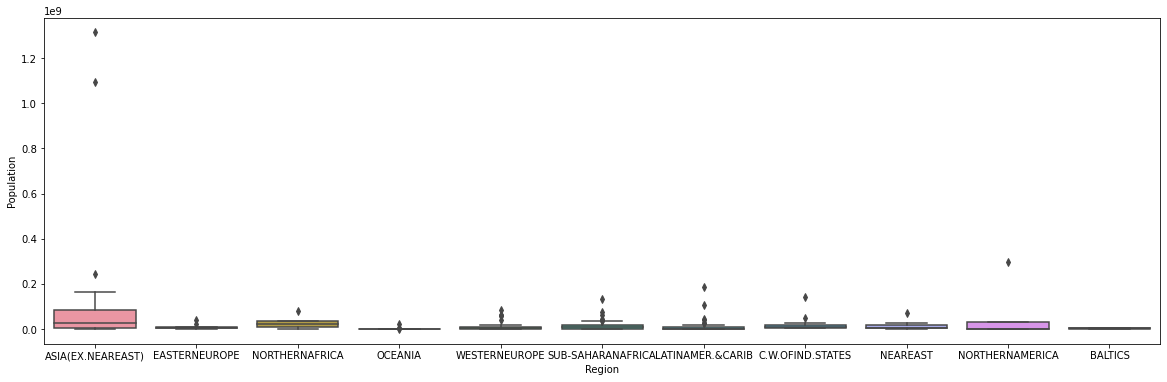

In [17]:
plt.subplots(figsize=(20,6))
sns.boxplot(x='Region', y='Population', data=df_copy)

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [18]:
from sklearn import preprocessing

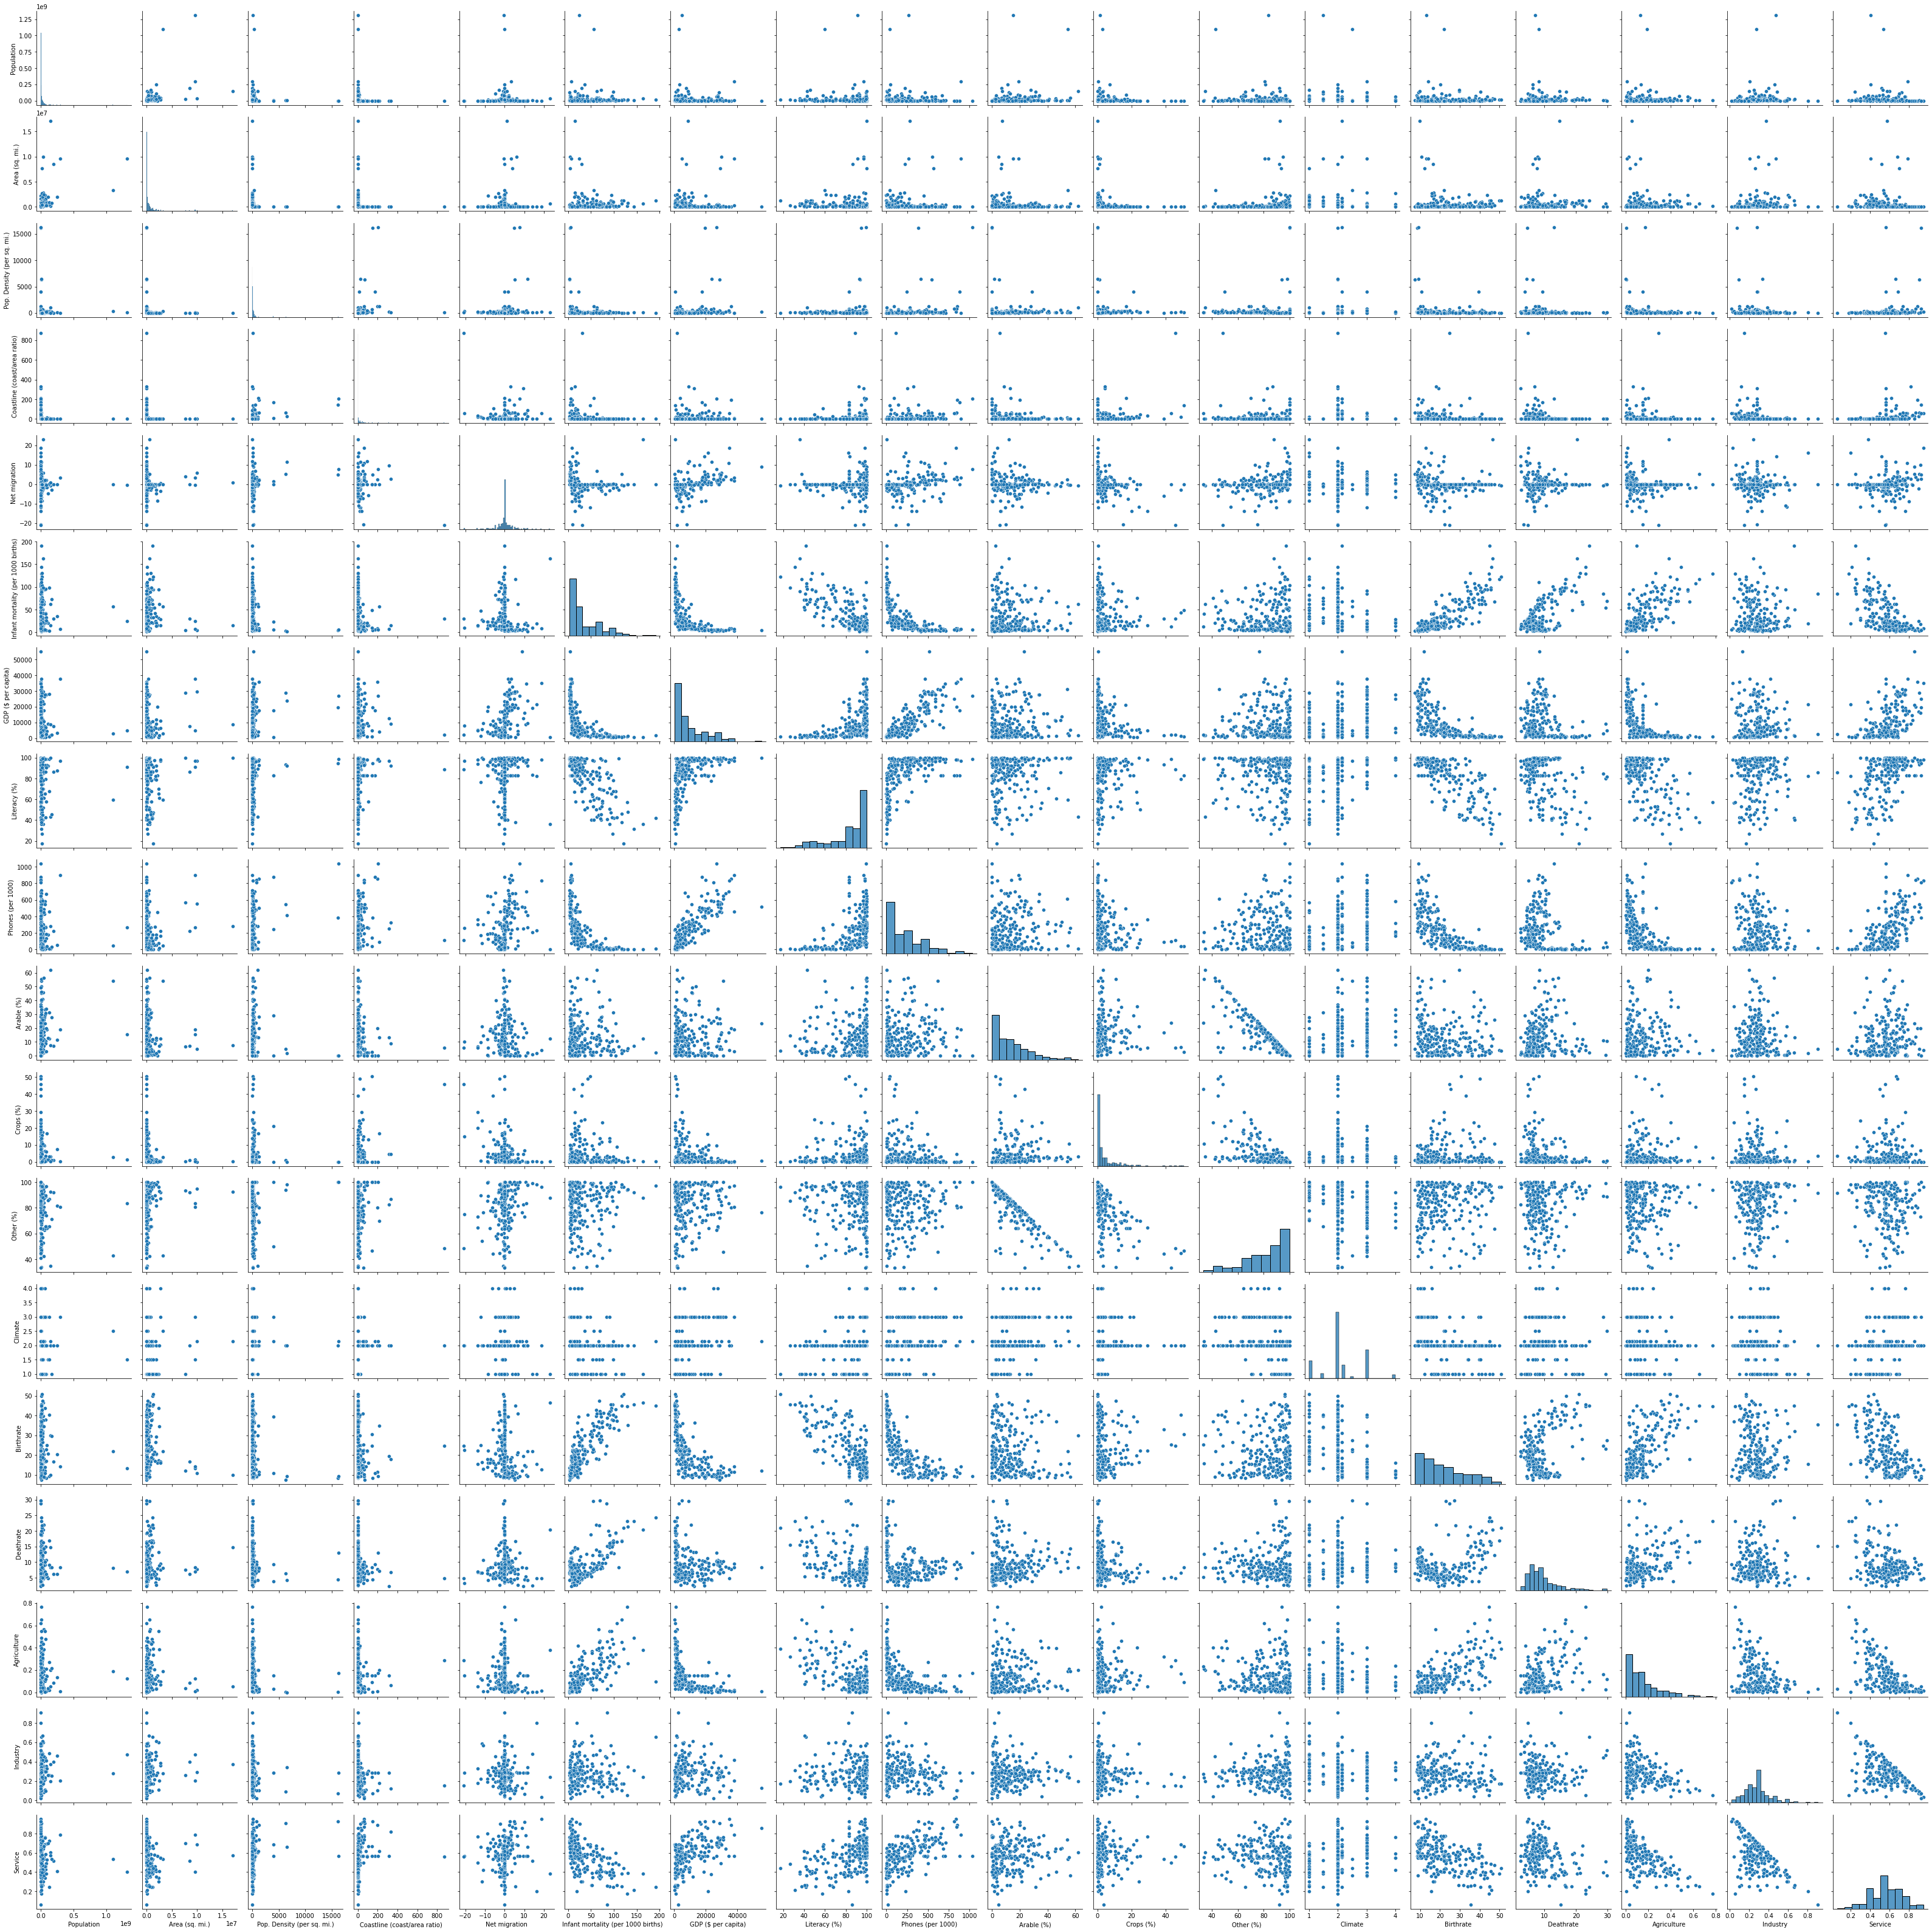

In [19]:
sns.pairplot(df_copy)

In [20]:
col_list =   df_copy.select_dtypes(include=['int64','float64']).columns
indxeslist = []
for col in col_list:
    indxeslist.append(df_copy[col] \
    [(np.abs(stats.zscore(df_copy[col])) > 3)].index.values.tolist())
flat_list = list(np.concatenate(indxeslist).flat)
flat_list
df_copy = df_copy .drop(flat_list,axis = 0)

In [21]:
min_max_scaler = preprocessing.MinMaxScaler()
df_transformed = min_max_scaler.fit_transform(df_copy.drop(["Country", "Region"], axis=1))

In [22]:
pca = PCA(n_components=2)
pca.fit(df_transformed)
df_pca = pca.fit_transform(df_transformed)

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

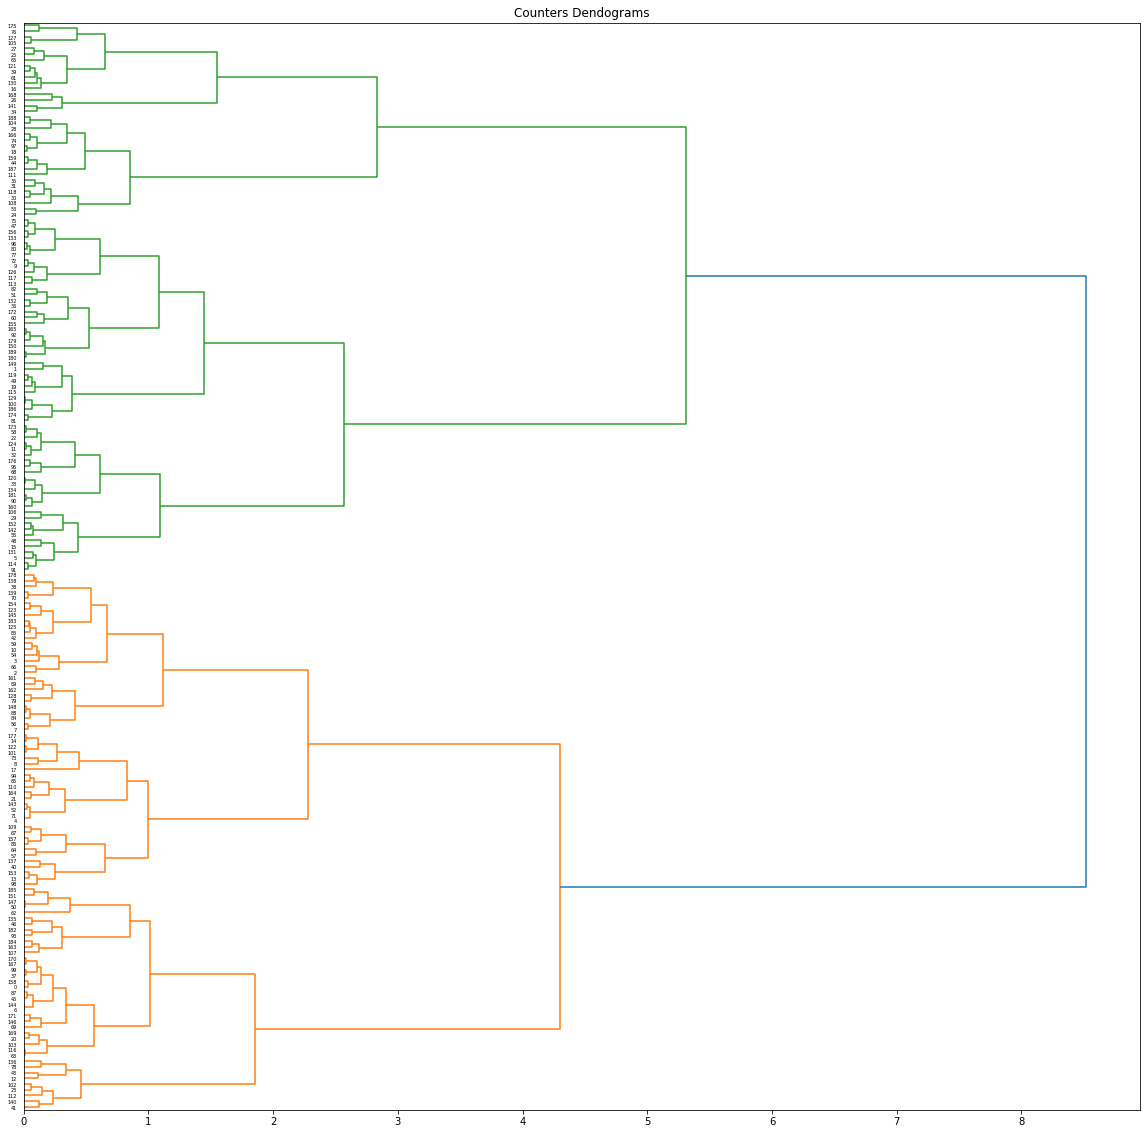

In [23]:
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_samples, silhouette_score


plt.figure(figsize=(20, 20))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_pca , method='ward', metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [24]:
#training
from sklearn.cluster import AgglomerativeClustering

In [25]:
aggler = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [26]:
aggler.fit(df_pca)

AgglomerativeClustering(n_clusters=3)

In [27]:
aggler.labels_

array([0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0,
       2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 2, 1, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1,
       2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2], dtype=int64)

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 